K-Nearest Neighbors implementation

In [1]:
#KNN Workbook for Group6
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
wine = datasets.load_wine()

In [3]:
# Load data
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target labels'] = wine.target

# Get data headers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target labels
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Let's check if any of these columns have outliers

In [5]:
for col in data.columns:
    if data[col].dtype == 'float64':
        low_bound = data[col].mean() - (3 * data[col].std())
        upper_bound = data[col].mean() + (3 * data[col].std())
        for value in data[col].values:
            if (value < low_bound or value > upper_bound):
                print(f'{col} has an outlier with value of {value}')

malic_acid has an outlier with value of 5.8
ash has an outlier with value of 3.22
ash has an outlier with value of 1.36
ash has an outlier with value of 3.23
alcalinity_of_ash has an outlier with value of 30.0
magnesium has an outlier with value of 151.0
magnesium has an outlier with value of 162.0
flavanoids has an outlier with value of 5.08
proanthocyanins has an outlier with value of 3.58
color_intensity has an outlier with value of 13.0
hue has an outlier with value of 1.71


These outliers do not show any obvious signs of being human transcription errors (or typos) so we'll keep them as is. This will introduce some noise into the data set and (hopefully) avoid overfitting

Let's load the features and target columns

In [6]:
X = data.drop(columns = ['target labels']).copy()
y = data['target labels'].copy()

Then split the training and test data

In [7]:
#Create our train and test sets 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Now let's scale the data using `StandardScaler` so as to give "equal footing" to distances for all attributes/features

In [8]:
#Scaling the data after train_test split
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X_test.columns)

In [9]:
# Make k-NN models with k's between 2 and 10

# Make a k-NN models in list
knn = []
predictions = []
for k in range(2, 11):

  # Form the model
  model = KNeighborsClassifier(n_neighbors=k)

  # Train each model
  model.fit(X_train_scaled, y_train)

  # Predict the values
  predictions.append(model.predict(X_test_scaled))

  # Add to model list
  knn.append(model)

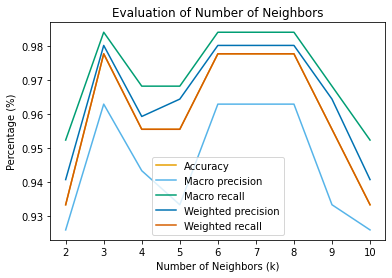

In [10]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']
target_names = ['class 0', 'class 1', 'class 2']

# Get evaluation metrics
k = list(range(2, 11))
acc = []
macro_precision = []
macro_recall = []
weighted_precision = []
weighted_recall = []

# class0_recalls = []
# class1_recalls = []
# class2_recalls = []
# class0_precisions = []
# class1_precisions = []
# class2_precisions = []

for prediction in predictions:
    #Get the confusion matrix
    conf_matrix = metrics.confusion_matrix(y_test, prediction)
    #Calculate the accuracy of the model
    correctly_labeled = np.diagonal(conf_matrix).sum()
    total_samples = len(y_test)
    accuracy = correctly_labeled / total_samples
    #Add the score to the list of acc
    acc.append(accuracy)
    
    #Get the classification report
    class_rep = metrics.classification_report(y_test, prediction, target_names = target_names, output_dict = True)
    macro_precision.append(class_rep['macro avg']['precision'])
    macro_recall.append(class_rep['macro avg']['recall'])
    weighted_precision.append(class_rep['weighted avg']['precision'])
    weighted_recall.append(class_rep['weighted avg']['recall'])
    
#     class0_precision = class_rep['class 0']['precision']
#     class0_recall = class_rep['class 0']['recall']
#     class1_precision = class_rep['class 1']['precision']
#     class1_recall = class_rep['class 1']['recall']
#     class2_precision = class_rep['class 2']['precision']
#     class2_recall = class_rep['class 2']['recall']

# Graph evaluation metrics
fig, ax = plt.subplots()
ax.plot(k, acc, color=colors[0], alpha=1, label='Accuracy')
ax.plot(k, macro_precision, color=colors[1], alpha=1, label='Macro precision')
ax.plot(k, macro_recall, color=colors[2], alpha=1, label='Macro recall')
ax.plot(k, weighted_precision, color=colors[3], alpha=1, label='Weighted precision')
ax.plot(k, weighted_recall, color=colors[4], alpha=1, label='Weighted recall')
ax.set_xlabel('Number of Neighbors (k)')
ax.set_ylabel('Percentage (%)')
ax.set_title(f'Evaluation of Number of Neighbors')
ax.legend(facecolor='white')
plt.show()

# Appears that 7 (6 or 8 also work; 3 looks like it is sitting at a local max so we'll avoid it)

In [11]:
#Let's see what values we get for k=7 (this would be values in predictions[5])
print(metrics.classification_report(y_test, predictions[5], target_names = target_names))


              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        16
     class 1       1.00      0.95      0.98        21
     class 2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



## Tuning hyperparameters with GridSearchCV


In [12]:
# Source: https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

# List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(2, 11))
p=[1, 2]

# Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Create new KNN object
knn_hp = KNeighborsClassifier()

# Use grid search to find the ideal hyperparamters
clf = GridSearchCV(knn_hp, hyperparameters, cv=5)

# Fit the model
best_model = clf.fit(X_train_scaled, y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 5


In [13]:
print(metrics.classification_report(y_test, predictions[6], target_names = target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        16
     class 1       1.00      0.95      0.98        21
     class 2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



## Removing properties to improve performance

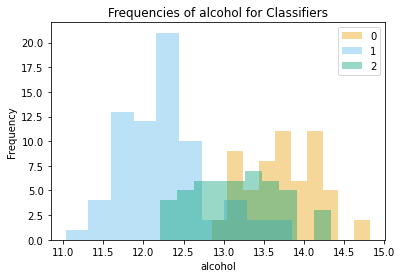

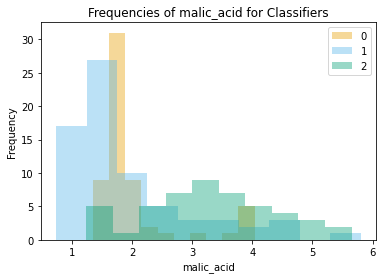

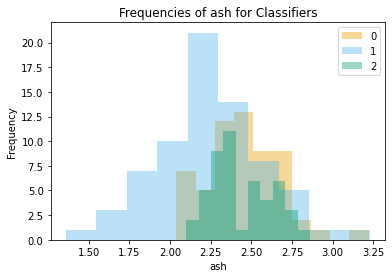

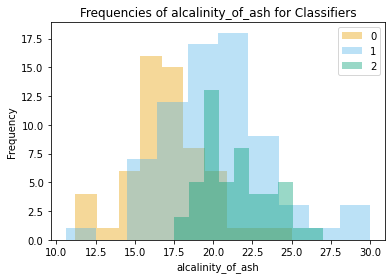

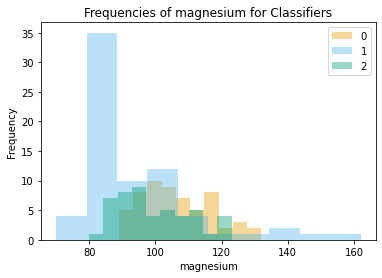

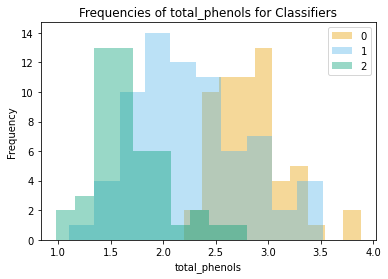

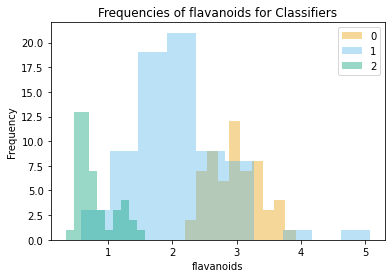

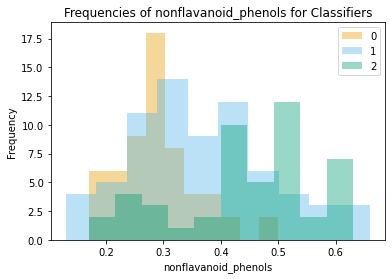

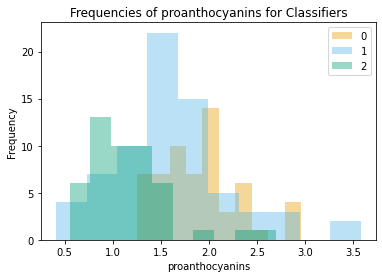

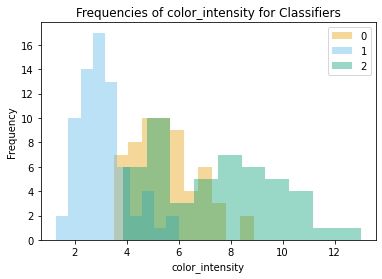

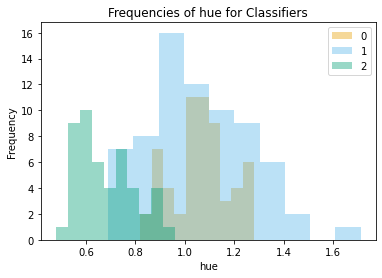

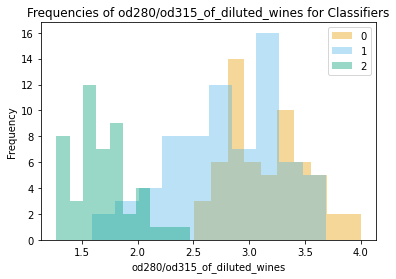

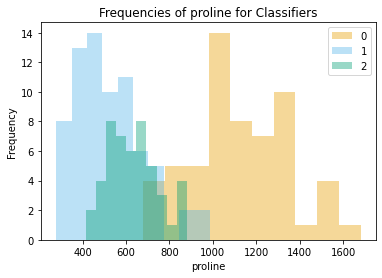

In [14]:
# Plot classification map
for column in data.drop(columns = 'target labels').columns:
    fig, ax = plt.subplots()
    i = 0
    for classifier in data['target labels'].unique():
        this_data = data[data['target labels'] == classifier]
        ax.hist(this_data[column], color=colors[i], alpha=0.4, label=classifier)
        i += 1
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequencies of {column} for Classifiers')
    ax.legend(facecolor='white')
    plt.show()

# Removed columns: malic_acid, ash, nonflavanoid_phenols

In [15]:
# Prepare data

# Drop columns
drop_columns = ['malic_acid', 'ash', 'nonflavanoid_phenols']
new_data = data.drop(columns=drop_columns).copy()

# Separate out classfiers
X_d = new_data.copy().drop(columns=['target labels'])
y_d = new_data.copy()['target labels']

# Generate training and testing set: 25%
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.25, random_state=0)

#Scaling the data after train_test split
X_d_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_d_train), columns = X_d_train.columns)
X_d_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_d_test), columns = X_d_test.columns)



In [16]:
# Train model using grid search

# Create new KNN object
knn_d_hp = KNeighborsClassifier()

# Use grid search to find the ideal hyperparamters
clf_d = GridSearchCV(knn_d_hp, hyperparameters, cv=5)

# Fit the model
best_model_d = clf_d.fit(X_d_train_scaled, y_d_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model_d.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_d.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_d.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 4


In [17]:
# Show the metrics of the best model
prediction_d = best_model_d.predict(X_d_test_scaled)
print(metrics.classification_report(y_d_test, prediction_d))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
#Loop through each column and see if the model improves if the column is removed
for col in data.columns:
    drop_columns = [col]
    new_data = data.drop(columns=drop_columns).copy()

    # Separate out classfiers
    X_d = new_data.copy().drop(columns=['target labels'])
    y_d = new_data.copy()['target labels']

    # Generate training and testing set: 25%
    X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.25, random_state=0)

    #Scaling the data after train_test split
    X_d_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_d_train), columns = X_d_train.columns)
    X_d_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_d_test), columns = X_d_test.columns)

    # Create new KNN object
    knn_d_hp = KNeighborsClassifier()

    # Use grid search to find the ideal hyperparamters
    clf_d = GridSearchCV(knn_d_hp, hyperparameters, cv=5)

    # Fit the model
    best_model_d = clf_d.fit(X_d_train_scaled, y_d_train)

    #Print The value of best Hyperparameters
    print('Best leaf_size:', best_model_d.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model_d.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model_d.best_estimator_.get_params()['n_neighbors'])
    
    # Show the metrics of the best model
    prediction_d = best_model_d.predict(X_d_test_scaled)
    print(f'Removal of column {col}.')
    print(metrics.classification_report(y_d_test, prediction_d))


In [19]:
#Final Model
new_data = data.drop(columns=['od280/od315_of_diluted_wines']).copy()

# Separate out classfiers
X_d = new_data.copy().drop(columns=['target labels'])
y_d = new_data.copy()['target labels']

# Generate training and testing set: 25%
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.25, random_state=0)

#Scaling the data after train_test split
X_d_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_d_train), columns = X_d_train.columns)
X_d_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_d_test), columns = X_d_test.columns)

# Create new KNN object
knn_d_hp = KNeighborsClassifier()

# Use grid search to find the ideal hyperparamters
clf_d = GridSearchCV(knn_d_hp, hyperparameters, cv=5)

# Fit the model
best_model_d = clf_d.fit(X_d_train_scaled, y_d_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model_d.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_d.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_d.best_estimator_.get_params()['n_neighbors'])

# Show the metrics of the best model
prediction_d = best_model_d.predict(X_d_test_scaled)
print(f'Removal of column {col}.')
print(metrics.classification_report(y_d_test, prediction_d))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 6
Removal of column alcohol.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

